# Ensemble Modelling

# Practice

In [1]:
# general imports
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sb 
from numpy import mean
from numpy import std

# data preprocessing imports
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model Building imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#Model evaluation import
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Data Preparation and Splitting

In [3]:
#Importing dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S7_KCHouse_Data_Practice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 21613.
The number of columns in data is 21.


In [5]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
# exploring the existing data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# checking missing values in data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.drop(columns=['id','date'],axis=1,inplace=True)

#### No any missing value in data 

<AxesSubplot:>

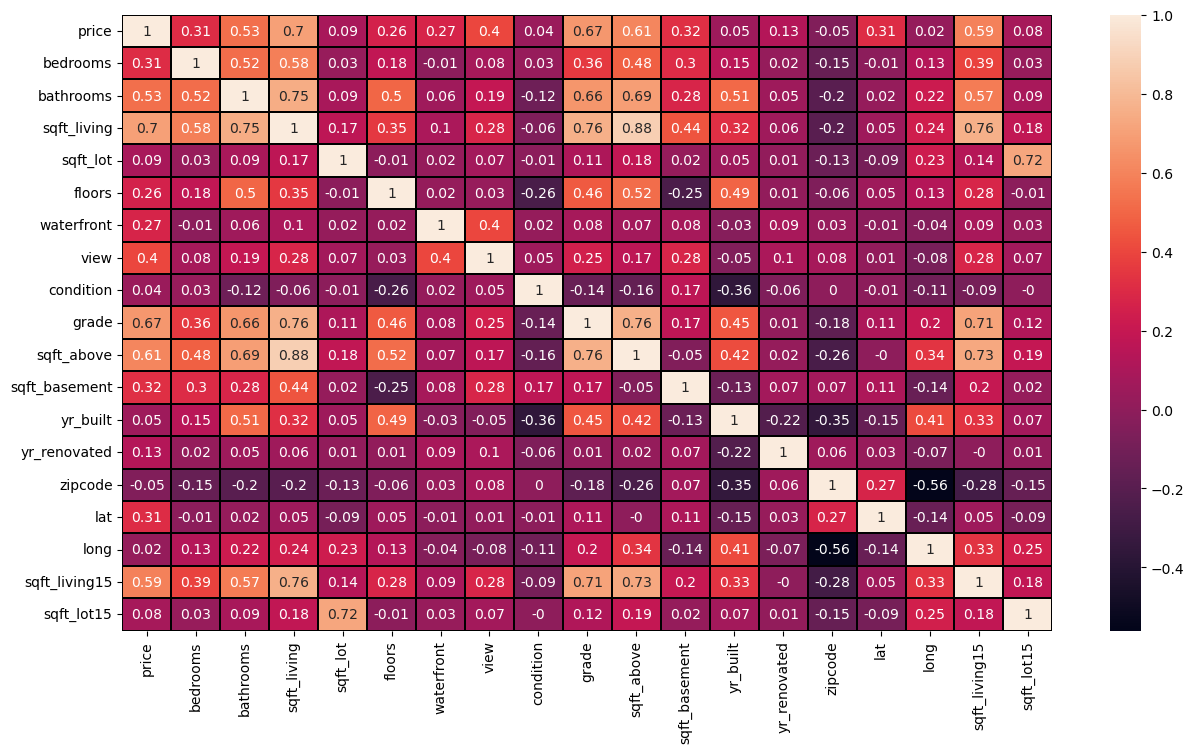

In [10]:
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.3,linecolor='black')

In [11]:
# Scaling Data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df)
df1=pd.DataFrame(df1,columns=df.columns)

In [12]:
#Creating test and training datasets

from sklearn.model_selection import train_test_split
X=df1.drop('price',axis=1)
y=df1['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)
print('Size of training dataset: ', X_train.shape)
print('Size of test dataset: ', X_test.shape)


Size of training dataset:  (15129, 18)
Size of test dataset:  (6484, 18)


# Baseline : Linear Regression

In [13]:
# define lists to gather results for plotting later
results, names = list(), list()

In [14]:
# define the model
LR = LinearRegression()
# evaluate the model
cv = KFold(n_splits=10, random_state=1,shuffle=True)
n_scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Linear Regression Accuracy : ',np.sqrt(-n_scores).mean())

names.append('LR')
results.append(np.sqrt(-n_scores).mean())

Linear Regression Accuracy :  0.5469486244239807


# Bagging With Random Forest

In [15]:
# define the model
RF = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10, random_state=1,shuffle=True)
n_scores = cross_val_score(RF, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Random Forest Accuracy : ',np.sqrt(-n_scores).mean())

names.append('RF')
results.append(np.sqrt(-n_scores).mean())

Random Forest Accuracy :  0.3421300734404923


# Boosting Using ADABoosting

In [16]:
# define the model
ADA = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10, random_state=1,shuffle=True)
n_scores = cross_val_score(ADA, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Adaboost Accuracy : ',np.sqrt(-n_scores).mean())

names.append('ADA')
results.append(np.sqrt(-n_scores).mean())

Adaboost Accuracy :  0.34290926978415354


# Stacking

In [17]:
def get_stacking():
    
    label=[]
    label.append(('DT',DecisionTreeRegressor()))
    label.append(('KNN',KNeighborsRegressor()))
    label.append(('SVM',SVR()))

    l1=LinearRegression()
    
    model=StackingRegressor(estimators=label,final_estimator=l1,cv=6)
    return model

In [18]:
model=get_stacking()
model

StackingRegressor(cv=6,
                  estimators=[('DT', DecisionTreeRegressor()),
                              ('KNN', KNeighborsRegressor()), ('SVM', SVR())],
                  final_estimator=LinearRegression())

In [19]:
y

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: price, Length: 21613, dtype: float64

In [20]:
cv=KFold(n_splits=5,random_state=10,shuffle=True)
score=cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)

In [21]:
# report performance
print('Stacking Accuracy : ',np.sqrt(score).mean())

names.append('Stacking')
results.append(np.sqrt(score).mean())

Stacking Accuracy :  nan


C:\Users\Admin\AppData\Local\Temp\ipykernel_5176\2455488850.py:2: RuntimeWarning: invalid value encountered in sqrt
  print('Stacking Accuracy : ',np.sqrt(score).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_5176\2455488850.py:5: RuntimeWarning: invalid value encountered in sqrt
  results.append(np.sqrt(score).mean())


In [22]:
names.append('ADA')
results.append(np.sqrt(-n_scores).mean())